### (1). Load the CIFAR-10 dataset and split it into train/validation/test subsets

In [3]:
from keras import models
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
import tensorflow as tf
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# load data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


print("Shape of train_images : ",train_images.shape)
print("Shape of train_labels : ",train_labels.shape)
print("Shape of test_images : ",test_images.shape)
print("Shape of test_labels : ",test_labels.shape)

Shape of train_images :  (50000, 32, 32, 3)
Shape of train_labels :  (50000, 1)
Shape of test_images :  (10000, 32, 32, 3)
Shape of test_labels :  (10000, 1)


In [4]:
# train and validation split
x_train = train_images[:40000]
y_train = train_labels[:40000]

x_validate = train_images[40000:]
y_validate = train_labels[40000:]

print("Shape of subset train_images : ",x_train.shape)
print("Shape of subset train_labels : ",y_train.shape)
print("Shape of subset validation_images : ",x_validate.shape)
print("Shape of subset validation_labels : ",y_validate.shape)
print("Shape of subset test_images : ",test_images.shape)
print("Shape of subset test_labels : ",test_labels.shape)

Shape of subset train_images :  (40000, 32, 32, 3)
Shape of subset train_labels :  (40000, 1)
Shape of subset validation_images :  (10000, 32, 32, 3)
Shape of subset validation_labels :  (10000, 1)
Shape of subset test_images :  (10000, 32, 32, 3)
Shape of subset test_labels :  (10000, 1)


In [5]:
# Convert labels to categorical
train_labels_categorical = to_categorical(y_train)
validation_labels_categorical = to_categorical(y_validate)
test_labels_categorical = to_categorical(test_labels)

# Normalize the images
train_images = x_train.astype('float32') / 255

validation_images = x_validate.astype('float32') / 255

test_images = test_images.astype('float32') / 255

In [6]:
print("Total no. of classes : ",train_labels_categorical[0].shape[0])

Total no. of classes :  10


In [7]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 3986,
 1: 3986,
 2: 4048,
 3: 3984,
 4: 4003,
 5: 3975,
 6: 4020,
 7: 4023,
 8: 3997,
 9: 3978}

In [8]:
unique, counts = np.unique(test_labels, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

In [9]:
unique, counts = np.unique(y_validate, return_counts=True)
dict(zip(unique, counts))

{0: 1014,
 1: 1014,
 2: 952,
 3: 1016,
 4: 997,
 5: 1025,
 6: 980,
 7: 977,
 8: 1003,
 9: 1022}

### (2). Build a convolution neural network

In [12]:
checkpoint_filepath = './tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)


model = models.Sequential()
# First Convolution layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
# Max pooling
model.add(MaxPooling2D((2, 2)))

# Second Convolution layer
model.add(Conv2D(64, (3,3), activation='relu'))
# Normalization
model.add(BatchNormalization())
# Max pooling
model.add(MaxPooling2D((2, 2)))

# Third Convolution layer
model.add(Conv2D(128, (3,3), activation='relu'))
# Max pooling
model.add(MaxPooling2D((2, 2)))


# Perform flattening
model.add(Flatten())

# Dropout layer
model.add(Dropout(0.5))

# Single Dense layer/Fully Connected layer/ Output layer
model.add(Dense(10, activation='softmax'))

# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)        

In [13]:
# Compile the network
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

history = model.fit(train_images, train_labels_categorical, epochs=30, batch_size=64, callbacks=[model_checkpoint_callback], 
                             validation_data=(validation_images, validation_labels_categorical))

Epoch 1/30
625/625 [==============================] - 34s 54ms/step - loss: 1.5478 - acc: 0.4412 - val_loss: 1.3050 - val_acc: 0.5478
Epoch 2/30
625/625 [==============================] - 33s 53ms/step - loss: 1.2043 - acc: 0.5722 - val_loss: 1.2167 - val_acc: 0.5639
Epoch 3/30
625/625 [==============================] - 33s 53ms/step - loss: 1.0816 - acc: 0.6205 - val_loss: 1.0509 - val_acc: 0.6344
Epoch 4/30
625/625 [==============================] - 34s 54ms/step - loss: 1.0054 - acc: 0.6455 - val_loss: 1.1486 - val_acc: 0.5886
Epoch 5/30
625/625 [==============================] - 34s 54ms/step - loss: 0.9438 - acc: 0.6699 - val_loss: 0.9594 - val_acc: 0.6632
Epoch 6/30
625/625 [==============================] - 34s 54ms/step - loss: 0.8988 - acc: 0.6846 - val_loss: 0.9742 - val_acc: 0.6516
Epoch 7/30
625/625 [==============================] - 34s 54ms/step - loss: 0.8654 - acc: 0.6982 - val_loss: 0.9704 - val_acc: 0.6592
Epoch 8/30
625/625 [==============================] - 34s 54ms

#### Plot the training and validation loss as a function of epochs. Plot the training and validation accuracy as a function of epochs

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

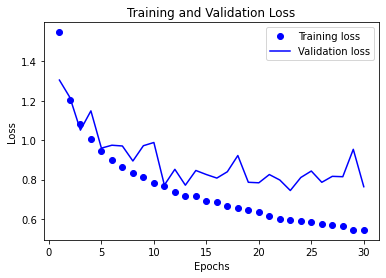

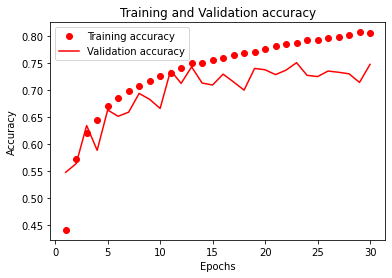

In [19]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_acc)+1)

# Plot loss plot 
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy plot 
plt.plot(epochs, train_acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### (3). Evaluate the performance on the test data

In [20]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

In [21]:
test_loss,test_acc = model.evaluate(test_images, test_labels_categorical)

print("Test loss for best validation model : ",test_loss)
print("Test accuracy for best validation model : ",test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.7482 - acc: 0.7442
Test loss for best validation model :  0.7482087016105652
Test accuracy for best validation model :  0.7441999912261963


### (4). Add one or two inception blocks and test performance

In [29]:
from keras.models import Model
from keras import layers
from keras import Input

# Using functional API of keras to build the network
input_tensor = Input(shape=(32,32,3))

# First Convolution layer
x = Conv2D(32, (3,3), activation='relu')(input_tensor)
# Normalization
x = BatchNormalization()(x)
# Max Pooling
x = MaxPooling2D((2, 2))(x)

# Second Convolution layer
x = Conv2D(64, (3,3), activation='relu')(x)
# Normalization
x = BatchNormalization()(x)
# Max pooling
#x = MaxPooling2D((2, 2), padding='same')(x)

# First Inception block
branch_a = Conv2D(128, (1,1), padding='same', activation='relu', strides=2)(x)
branch_b = Conv2D(128, (1,1), padding='same', activation='relu')(x)
branch_b = Conv2D(128, (3,3), padding='same', activation='relu', strides=2)(branch_b) 
branch_c = layers.AveragePooling2D((3,3), padding='same', strides=2)(x)
branch_c = Conv2D(128, (3,3), padding='same', activation='relu')(branch_c)
branch_d = Conv2D(128, (1,1), padding='same', activation='relu')(x)
branch_d = Conv2D(128, (3,3), padding='same', activation='relu')(branch_d)
branch_d = Conv2D(128, (3,3), padding='same', activation='relu', strides=2)(branch_d)
output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis = -1)

# Third Convolution layer
x = Conv2D(128, (3,3), activation='relu')(output)
# Max pooling
x = MaxPooling2D((2, 2))(x)

# Perform flattening
x = Flatten()(x)
# Dropout layer
x = Dropout(0.5)(x)

# Single Dense layer/Fully Connected layer/ Output layer
output_tensor = Dense(10, activation='softmax')(x)

model = Model(input_tensor, output_tensor)
# Model summary
model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 30, 30, 32)   896         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 30, 30, 32)   128         conv2d_94[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_20 (MaxPooling2D) (None, 15, 15, 32)   0           batch_normalization_12[0][0]     
_______________________________________________________________________________________

In [30]:
checkpoint_filepath = './tmp1/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

history = model.fit(train_images, train_labels_categorical, epochs=20, batch_size=64, callbacks=[model_checkpoint_callback], 
                             validation_data=(validation_images, validation_labels_categorical))

Epoch 1/20
625/625 [==============================] - 224s 359ms/step - loss: 1.5516 - acc: 0.4348 - val_loss: 1.5980 - val_acc: 0.4315
Epoch 2/20
625/625 [==============================] - 232s 371ms/step - loss: 1.1598 - acc: 0.5895 - val_loss: 2.0258 - val_acc: 0.4340
Epoch 3/20
625/625 [==============================] - 235s 377ms/step - loss: 0.9902 - acc: 0.6526 - val_loss: 0.9945 - val_acc: 0.6547
Epoch 4/20
625/625 [==============================] - 237s 379ms/step - loss: 0.8866 - acc: 0.6930 - val_loss: 0.9919 - val_acc: 0.6500
Epoch 5/20
625/625 [==============================] - 234s 374ms/step - loss: 0.8081 - acc: 0.7204 - val_loss: 1.0790 - val_acc: 0.6226
Epoch 6/20
625/625 [==============================] - 236s 378ms/step - loss: 0.7360 - acc: 0.7462 - val_loss: 0.8606 - val_acc: 0.6902
Epoch 7/20
625/625 [==============================] - 233s 373ms/step - loss: 0.6855 - acc: 0.7616 - val_loss: 0.9731 - val_acc: 0.6728
Epoch 8/20
625/625 [============================

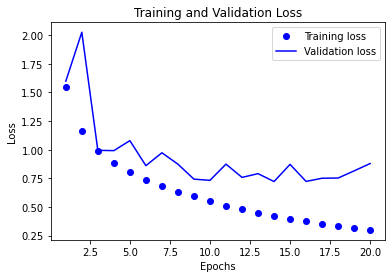

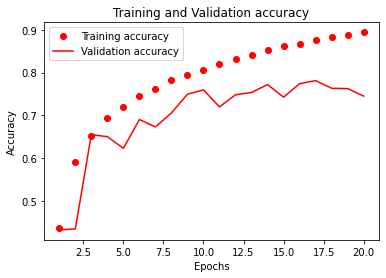

In [31]:
history_dict = history.history

train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_acc)+1)

# Plot loss plot 
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy plot 
plt.plot(epochs, train_acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

In [33]:
test_loss,test_acc = model.evaluate(test_images, test_labels_categorical)

print("Test loss for best validation model : ",test_loss)
print("Test accuracy for best validation model : ",test_acc)

313/313 [==============================] - 14s 43ms/step - loss: 0.7531 - acc: 0.7729
Test loss for best validation model :  0.7530990242958069
Test accuracy for best validation model :  0.7728999853134155


### (5). Remove the inception blocks and add one or two residual blocks instead

In [44]:
# Using functional API of keras to build the network
input_tensor = Input(shape=(32,32,3))

# First Convolution layer
x = Conv2D(32, (3,3), activation='relu')(input_tensor)
# Normalization
x = BatchNormalization()(x)
# Max Pooling
x = MaxPooling2D((2, 2))(x)

# Second Convolution layer
x = Conv2D(128, (3,3), activation='relu')(x)
# Normalization
x = BatchNormalization()(x)
# Max pooling
x = MaxPooling2D((2, 2), padding='same')(x)

# First Residual block
y = Conv2D(128, (3,3), padding='same', activation='relu')(x)
y = Conv2D(128, (3,3), padding='same', activation='relu')(y)
y = Conv2D(128, (3,3), padding='same', activation='relu')(y) 
# adds the original x back to the output features
y = layers.add([y,x])


# Third Convolution layer
x = Conv2D(128, (3,3), activation='relu')(y)
# Max pooling
x = MaxPooling2D((2, 2))(x)

# Perform flattening
x = Flatten()(x)
# Dropout layer
x = Dropout(0.5)(x)

# Single Dense layer/Fully Connected layer/ Output layer
output_tensor = Dense(10, activation='softmax')(x)

model = Model(input_tensor, output_tensor)
# Model summary
model.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_127 (Conv2D)             (None, 30, 30, 32)   896         input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 30, 30, 32)   128         conv2d_127[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_30 (MaxPooling2D) (None, 15, 15, 32)   0           batch_normalization_22[0][0]     
______________________________________________________________________________________

In [45]:
checkpoint_filepath = './tmp2/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

history = model.fit(train_images, train_labels_categorical, epochs=20, batch_size=64, callbacks=[model_checkpoint_callback], 
                             validation_data=(validation_images, validation_labels_categorical))

Epoch 1/20
625/625 [==============================] - 112s 179ms/step - loss: 1.6786 - acc: 0.4002 - val_loss: 1.9567 - val_acc: 0.3869
Epoch 2/20
625/625 [==============================] - 115s 184ms/step - loss: 1.2695 - acc: 0.5495 - val_loss: 1.1641 - val_acc: 0.5692
Epoch 3/20
625/625 [==============================] - 119s 190ms/step - loss: 1.0865 - acc: 0.6173 - val_loss: 0.9803 - val_acc: 0.6519
Epoch 4/20
625/625 [==============================] - 123s 196ms/step - loss: 0.9438 - acc: 0.6686 - val_loss: 1.0857 - val_acc: 0.6079
Epoch 5/20
625/625 [==============================] - 125s 200ms/step - loss: 0.8378 - acc: 0.7060 - val_loss: 0.9339 - val_acc: 0.6839
Epoch 6/20
625/625 [==============================] - 127s 203ms/step - loss: 0.7482 - acc: 0.7381 - val_loss: 1.0555 - val_acc: 0.6430
Epoch 7/20
625/625 [==============================] - 127s 203ms/step - loss: 0.6689 - acc: 0.7684 - val_loss: 0.8910 - val_acc: 0.7064
Epoch 8/20
625/625 [============================

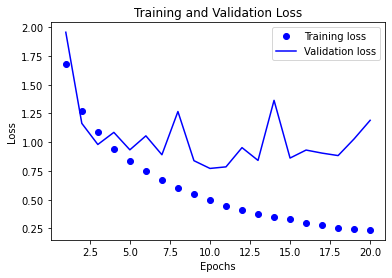

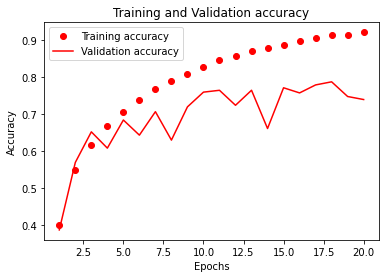

In [46]:
history_dict = history.history

train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_acc)+1)

# Plot loss plot 
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy plot 
plt.plot(epochs, train_acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

In [48]:
test_loss,test_acc = model.evaluate(test_images, test_labels_categorical)

print("Test loss for best validation model : ",test_loss)
print("Test accuracy for best validation model : ",test_acc)

313/313 [==============================] - 7s 24ms/step - loss: 0.9311 - acc: 0.7757
Test loss for best validation model :  0.9311480522155762
Test accuracy for best validation model :  0.7756999731063843
